In this notebook we want to classify mnist dataset using SVM. furthermore we use one vs many separation in order to classify the dataset with support vector machines.

we start with adding dependencies ⚓

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sklearn.__version__

'1.0.1'

lets import mnist dataset:


In [ ]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


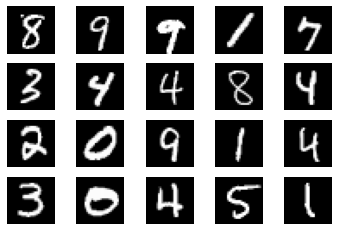

In [ ]:
import random
#show 20 random images from the data set
n_images = X_train.shape[0]
n_rows=4
n_cols=5

for i in range(1,n_rows*n_cols+1):
    im_idx = random.randint(0,n_images-1)
    pixels=X_train[im_idx]
    plt.subplot(n_rows, n_cols, i)
    plt.imshow(pixels, cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
X_test.shape

(10000, 28, 28)

reshaping the 28*28 image to 784 feature vector ...

In [ ]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# investigate the size of the feature matrices
print(X_train.shape)
print(X_test.shape)
# inspect one example
print(X_train[1])

(60000, 784)
(10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0. 

Normalizing and scaling data :

In [ ]:
# ## Normalization

X_train = X_train/255.0
X_test = X_test/255.0


#scaling
from sklearn.preprocessing import scale
X_train= scale(X_train)
X_test=scale(X_test)
# X_train.shape


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and mig

In [ ]:
X_test[10]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.01000054, -0.01000036,
       -0.01000043, -0.01397452, -0.01893169, -0.02318266, -0.03607163,
       -0.03926261, -0.03802754, -0.03901463, -0.03460448, -0.0257765 ,
       -0.02097165, -0.02178061, -0.01449979, -0.01188169,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.0178097 , -0.0232049 , -0.02986797, -0.04143778,
       -0.05865159, -0.08126186, -0.10599093, -0.12170485, -0.13

Now our data is ready so let's begin with building a simple model.
first, we build linear and then non-linear with different parameters.
for building such model we use svc library from sklrean.svm which stands for support vector classifier . this function accept multiple parameters but one of the most important one is the kernel and it can be linear , sigmoid, poly, rbf and precomputed. first we build our model with linear kernel to see its accuracy.

In [ ]:
 #importing svc and other libs
 from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
 
 #linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, Y_train)

# predict
y_pred = model_linear.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print(y_pred[130:150,])
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

[6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2 0 2]
accuracy: 0.9281 

[[ 953    0    6    2    1    8    6    2    1    1]
 [   0 1118    7    2    0    1    2    1    4    0]
 [   9   12  956   11    9    4    5    5   18    3]
 [   7    1   15  940    0   17    1    6   19    4]
 [   3    2   18    1  928    0    3    6    3   18]
 [   7    6    7   40    5  791   12    1   20    3]
 [  14    3   17    1    9   19  892    0    3    0]
 [   2    8   23   14   11    2    0  945    2   21]
 [  11    7   10   29    8   23    8    6  860   12]
 [   9    7    6   11   38    5    0   23   12  898]]


As you can see, it gave us .93% accuracy with just using a simple linear kernel and its default hyper parameters.
so lets check other model to see whether our accuracy is going to improve or not ...

In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, Y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.9656 

[[ 967    0    2    1    0    3    3    2    2    0]
 [   0 1125    5    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    3  980    1    7    0   12    7    0]
 [   0    0   13    0  945    2    3    7    2   10]
 [   2    0    2   11    1  857    6    5    6    2]
 [   6    2    0    0    4    8  927    6    5    0]
 [   1    6   13    3    3    0    0  989    0   13]
 [   3    0    6    5    6   10    3   12  926    3]
 [   4    5    6   11   13    2    0   21    3  944]]


After using rbf kernel we reached the accuracy of 96% which is perfectly high in comparison to human recognition of the same dataset.The important question is what is rbf kernel ?


first we need to understand the word "kernel" in this context.basically, A kernel is a function that takes the original non-linear problem and transforms it into a linear one within the higher-dimensional space.
Suppose you have two classes — red and black, as shown below:
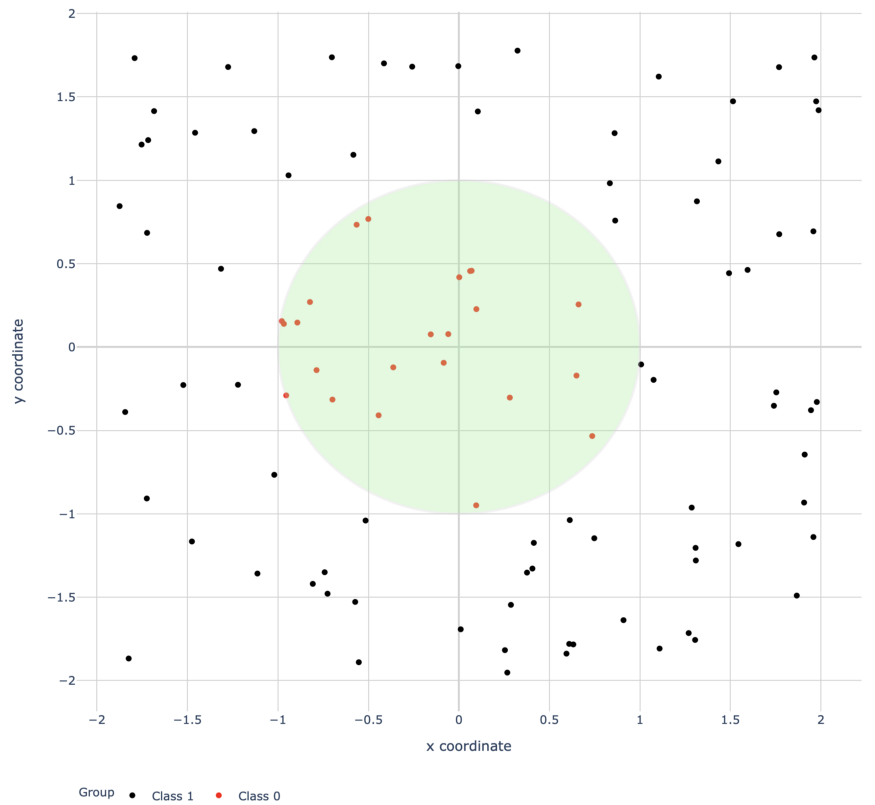

As you can see, red and black points are not linearly separable since we cannot draw a line that would put these two classes on different sides of such a line. However, we can separate them by drawing a circle with all the red points inside it and the black points outside it.
How to transform this problem into a linear one?
Let’s add a third dimension and make it a sum of squared x and y values:
z = x² + y²
Using this three-dimensional space with x, y, and z coordinates, we can now draw a hyperplane (flat 2D surface) to separate red and black points. Hence, the SVM classification algorithm can now be used.

**Radial basis function :**
RBF is the default kernel used within the sklearn’s SVM classification algorithm and can be described with the following formula: <br/>
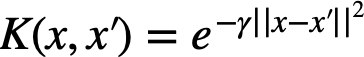

where gamma can be set manually and has to be >0. The default value for gamma in sklearn’s SVM classification algorithm is: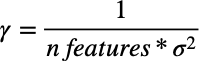

as a conclusion for hyper parameters that we are dealing with : <br/><br/>
||x - x'||² is the squared Euclidean distance between two feature vectors (2 points).<br/>Gamma is a scalar that defines how much influence a single training example (point) has. 

Now let's change the gamma hyper param and C (regularization param ) for achieving any better results in accuracy .

In [ ]:
# non-linear model
# using rbf kernel, C=10, gamma= 0.001

# model
non_linear_model_custom_param = SVC(C=10, gamma=0.001,kernel='rbf')

# fit
non_linear_model_custom_param.fit(X_train, Y_train)



In [ ]:
# confusion matrix and accuracy
# predict
y_pred = non_linear_model_custom_param.predict(X_test)
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.9724 

[[ 967    0    3    2    1    2    2    1    2    0]
 [   0 1128    3    0    0    1    2    1    0    0]
 [   6    3 1001    0    2    0    1   13    5    1]
 [   0    0    3  982    1    8    0    8    7    1]
 [   0    0    8    0  953    1    3    7    2    8]
 [   3    0    1    8    2  865    4    4    4    1]
 [   5    2    0    0    3    8  935    3    2    0]
 [   0    4   11    2    1    1    0 1000    0    9]
 [   3    2    5    5    4    8    2    8  931    6]
 [   1    5    4    8   12    3    0   12    2  962]]


There was a significant improvement in accuracy. However, we continue building different models with "sigmoid " kernel and "poly" kernel .
first lets measure the sigmoid kernel accuracy .

In [ ]:
#sigmoid model
# using sigmoid kernel, C=default, gamma=default

# model
non_linear_model_sigmoid = SVC(kernel='sigmoid')

# fit
non_linear_model_sigmoid.fit(X_train, Y_train)

# predict
y_pred = non_linear_model_sigmoid.predict(X_test)

In [ ]:
# confusion matrix and accuracy
y_pred = non_linear_model_sigmoid.predict(X_test)
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.8886 

[[ 928    0    8    3    2   22   15    1    1    0]
 [   0 1120    2    2    0    2    3    0    5    1]
 [  19   12  875   27   12    4   35   10   26   12]
 [  10    2   39  880    4   24    2   18   19   12]
 [   3    3   19    4  889    0   11   10    1   42]
 [  20    5   13   46    8  744    9    2   34   11]
 [  35    4   43    2   11   16  844    0    3    0]
 [   3   11   23   24   14    0    2  901    1   49]
 [  16   11   15   26    7   51    5    8  824   11]
 [   7    7   10   13   41    8    0   35    7  881]]


sigmoid function not really fit for this dataset.let's try poly kernel .

In [ ]:
#poly model
# using poly kernel, C=default, gamma=default

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, Y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.9611 

[[ 962    0    0    1    0    3    4    0   10    0]
 [   0 1122    3    0    2    1    4    0    3    0]
 [   6    0  977    4    2    0    2    6   35    0]
 [   0    0    0  972    0    4    2    5   21    6]
 [   0    0    2    0  952    0    7    2    5   14]
 [   2    1    2    4    2  862    7    1    9    2]
 [   4    3    1    0   10    7  920    0   13    0]
 [   1    9   11    2   13    0    0  956   10   26]
 [   1    0    3    7    4    7    2    2  944    4]
 [   3    4    1   12   27    3    0    3   12  944]]


poly kernel is doing well so lets play with its hyper parameters.

In [ ]:
#poly model
# using poly kernel, C=10, gamma=0.001

# model
non_linear_model_custom_poly = SVC(kernel='poly')

# fit
non_linear_model_custom_poly.fit(X_train, Y_train)

# predict
y_pred = non_linear_model_custom_poly.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")


accuracy: 0.9611 



**Final words** <br/>
In conclusion, There are several ways to classify mnist dataset. First approach that was implemented in this article was a simple linear model with 93% accuracy . After that non-linear kernel were adapted to our svm model and among them rbf kernel with customized hyper parameters gave us the accuracy of 97% for test dataset. Poly kernel also achieved approximately same accuracy but sigmoid kernel was not able to predict better than 87% .